<a href="https://colab.research.google.com/github/Sandraa123/python/blob/main/HEART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression



<ipython-input-73-4999c5d8f5c7>:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Heart_Disease_Prediction.csv")
data


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [ ]:
data.shape

(270, 14)

In [ ]:
data.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [ ]:
data['Heart Disease']=data['Heart Disease'].apply(lambda x:0 if x=='Absence' else 1)

data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [ ]:
data['Heart Disease'].value_counts()

0    150
1    120
Name: Heart Disease, dtype: int64

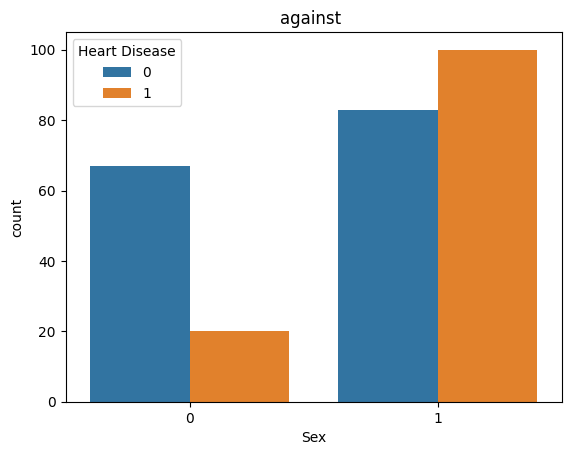

In [ ]:
sns.countplot(x='Sex',hue='Heart Disease',data=data)
plt.title('against ')
plt.show()

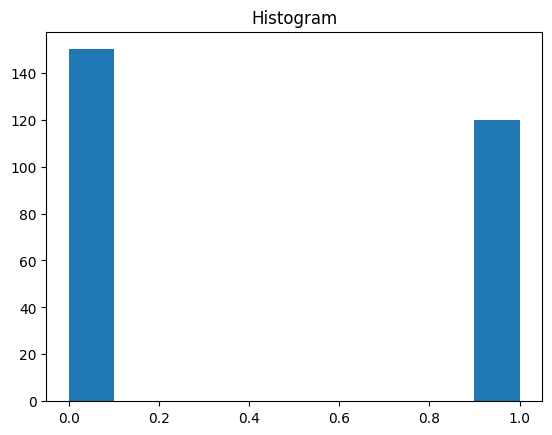

In [ ]:
plt.hist(data['Heart Disease'])
plt.title("Histogram")
plt.show()

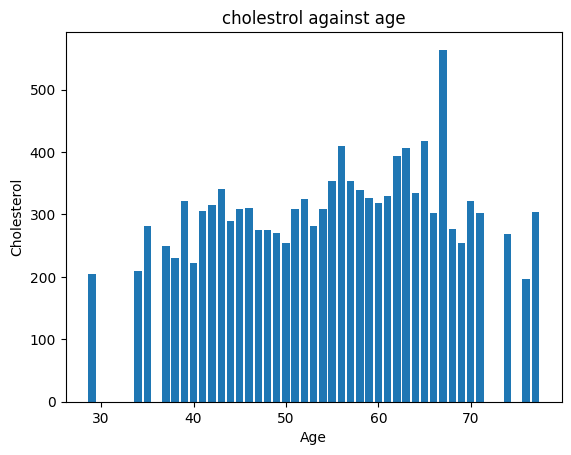

In [ ]:
plt.bar(data['Age'],data['Cholesterol'])
plt.title("cholestrol against age")
plt.xlabel('Age')
plt.ylabel('Cholesterol')

plt.show()

Text(0.5, 1.0, 'Age vs BP')

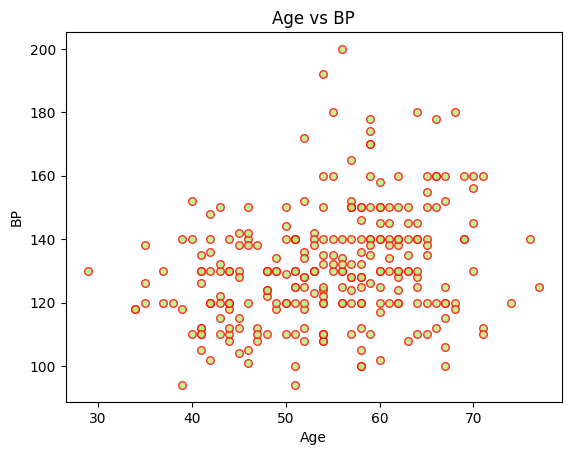

In [ ]:
plt.scatter(data['Age'],data['BP'], s=30, c = '#b6eb7a', edgecolor = 'red', linewidth = 1, alpha = 0.8)
plt.xlabel('Age')
plt.ylabel('BP')
plt.title('Age vs BP')

In [ ]:
dvar='Heart Disease'
ivar=['Age',	'Sex',	'Chest pain type',	'BP',	'Cholesterol',	'FBS over 120',	'EKG results',	'Max HR',	'Exercise angina',	'ST depression',	'Slope of ST',	'Number of vessels fluro',	'Thallium'	]
y=data[dvar]
x=data[ivar]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 10)


# **Decison tree**

In [ ]:
dt = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)

In [ ]:
y_pre=dt.predict(x_test)
y_pre

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0])

In [ ]:
ac=accuracy_score(y_test,y_pre)
ac

0.75

# **Random forest**

In [ ]:
rf=RandomForestClassifier(n_estimators=100,random_state=0)
rf
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
ypred= rf.predict(x_test)
ypred

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0])

In [ ]:
accuracy=accuracy_score(y_test,ypred)
accuracy

0.8529411764705882


# **KNN**





In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_preed=classifier.predict(x_test)
y_preed

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0])

In [ ]:
accuracyy=accuracy_score(y_test,y_preed)
accuracyy

0.6911764705882353

# **SVM**

In [ ]:
from sklearn.svm import SVC
model=SVC(kernel='linear',random_state=0)
model.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pd=model.predict(x_test)
y_pd

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0])

In [ ]:
accu=accuracy_score(y_pd,y_test)
accu

0.8970588235294118

# **logistic regression**

In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
pred_y= lr.predict(x_test)
pred_y

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0])

In [ ]:
a=accuracy_score(y_test,pred_y)
a

0.8970588235294118

# **Naive bayes classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gaus=GaussianNB()
gaus.fit(x_train,y_train)


GaussianNB()

In [ ]:
y_p=gaus.predict(x_test)
y_p

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0])

In [ ]:
accuracy_score(y_test,y_p)

0.8970588235294118

# **conclusion**

SVM ,KNN and naive bayes classifier are more accurate.the accuracy score is 0.8970588235294118